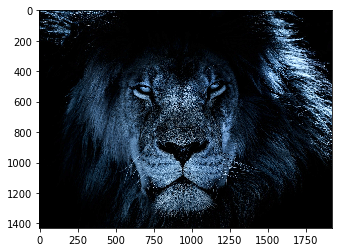

In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from matplotlib import pyplot as plt


image = cv2.imread('lion.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 4)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('lion1.jpg', quant)
plt.imshow(image)

cv2.imread('lion.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.imshow(image)

In [14]:
!pip install opencv-python

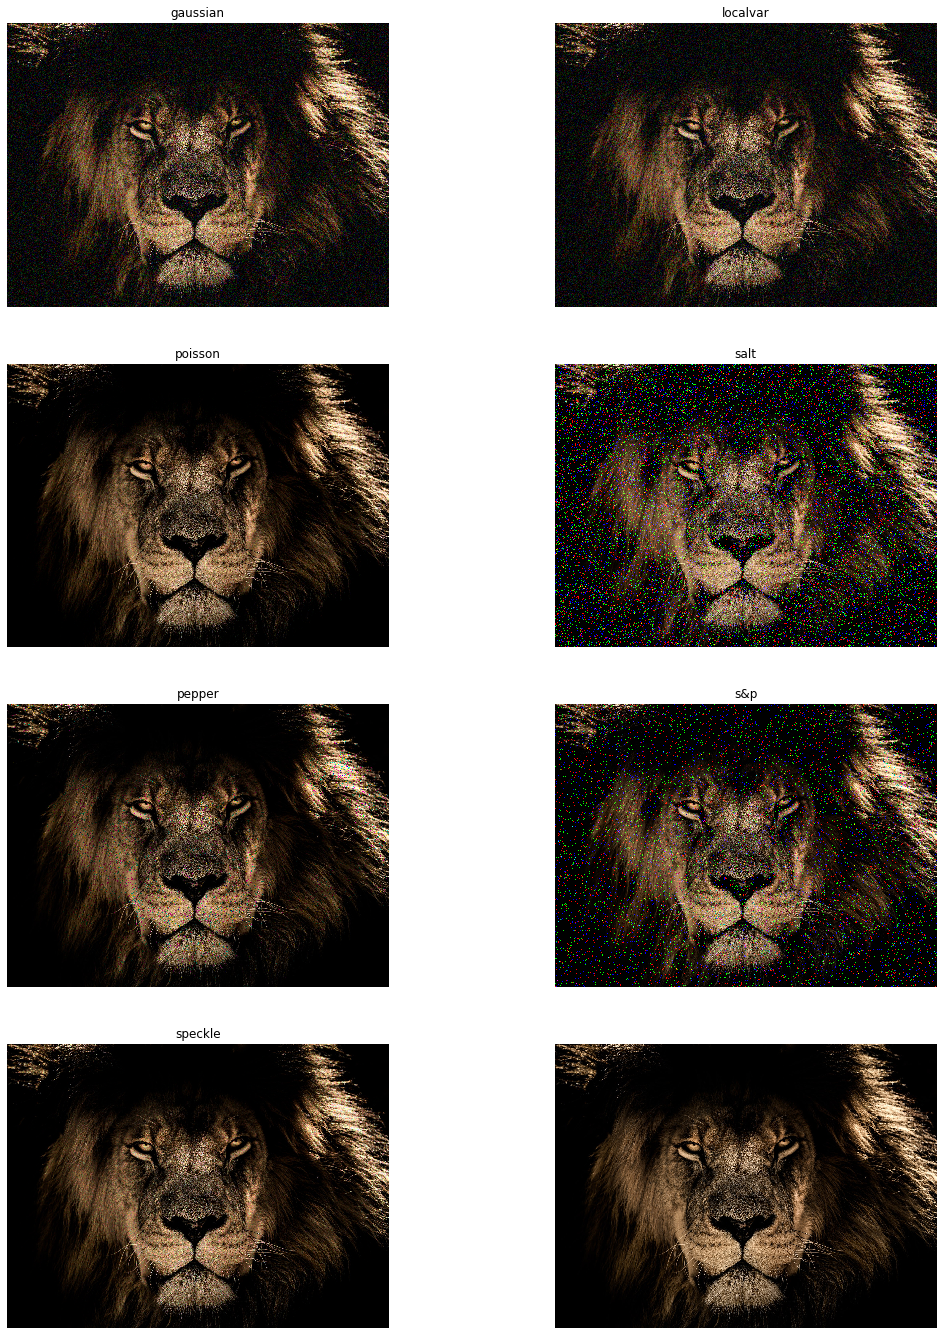

<Figure size 1296x1728 with 0 Axes>

<Figure size 1296x1728 with 0 Axes>

In [3]:
import skimage.io
import matplotlib.pyplot as plt
img_path="lion.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()
plt.figure(figsize=(18,24))

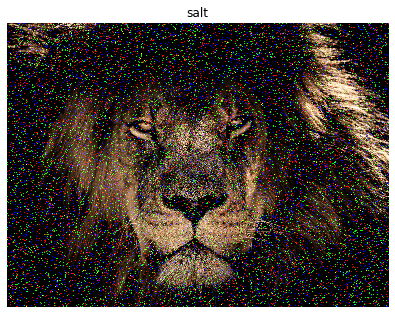

In [4]:
plt.figure(figsize=(18,24))
plotnoise(img, "salt", r,c,1)
plt.show()

In [ ]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma


img_salt_pepper_noise = img_as_float(io.imread('salt.png', as_gray=True))

img = img_salt_pepper_noise

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
#sigma_est = 0.1

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)



#denoise_img_as_8byte = img_as_ubyte(denoise_img)



cv2.imshow("Original", img)
cv2.imshow("NLM Filtered", denoise_img)
cv2.waitKey(0)          
cv2.destroyAllWindows() 
